In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

In [8]:
df = pd.read_csv('sim_results.csv', index_col=0)
df.head()

,ATL,CLE,NOP,CHI,DAL,DEN,GSW,HOU,LAC,LAL,...,POR,SAC,SAS,OKC,TOR,UTA,MEM,WAS,DET,CHA
simulation_1,4.833799,3.300927,3.611786,5.813849,4.111307,1.290291,5.891781,2.970465,2.116425,2.261691,...,5.485784,2.986081,2.598910,1.369008,5.447085,2.485076,3.801691,2.423196,3.865612,2.868279
simulation_2,2.068614,2.156992,5.403046,4.305816,3.722519,2.281588,4.354938,2.970465,2.902582,2.752439,...,4.010634,3.758706,3.537455,4.284095,5.084484,3.644032,4.266772,3.248004,2.849082,2.868279
simulation_3,3.152337,3.649461,2.235957,4.305816,2.738942,3.194290,2.931439,6.318824,3.668298,4.437719,...,3.344316,4.437206,1.885871,5.011414,3.336629,2.912490,2.063110,4.262496,2.849082,3.329076
simulation_4,2.068614,1.792754,3.611786,3.615070,2.280469,2.281588,2.931439,5.883315,2.421822,4.101611,...,3.344316,4.437206,4.645506,4.674319,1.106414,3.300474,3.801691,2.104438,1.092198,4.395563
simulation_5,3.795002,3.649461,1.957519,3.615070,4.111307,5.142711,3.696233,3.718333,4.379233,2.752439,...,2.474344,1.433203,3.088488,3.878669,3.336629,2.153102,3.801691,3.847656,3.865612,2.868279


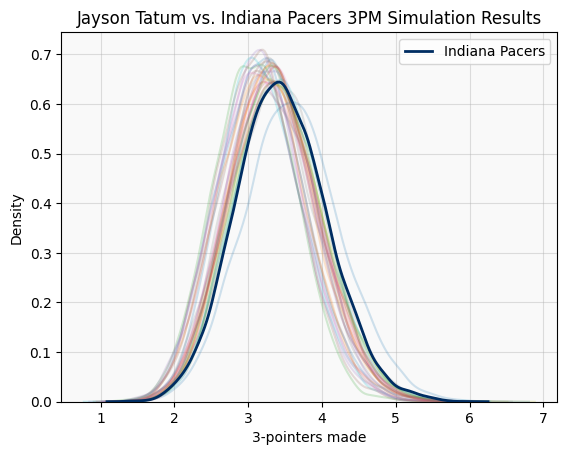

In [59]:
sns.kdeplot(gaussian_filter1d(df['IND'].values, 1), color='#002d62', alpha=1, lw=2, zorder=1000);

for team in df.columns:
    if team == 'IND':
        continue
    sns.kdeplot(gaussian_filter1d(df[team].values, 1), alpha=0.2);

fig, ax = plt.gcf(), plt.gca()
ax.grid(alpha=0.4);
ax.set_facecolor('#f9f9f9');
ax.set_xlabel('3-pointers made');
ax.set_title('Jayson Tatum vs. Indiana Pacers 3PM Simulation Results');
ax.legend(
   ['Indiana Pacers']
);

In [27]:
over_unders = np.linspace(0, 10, 21)
over_unders

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [39]:
columns = ['mean', 'std']
columns.extend(f'P(> {over_under})' for over_under in over_unders)
team_data = {}
for team in df.columns:
    sim_results_team_i = df[team].values
    mean_i = sim_results_team_i.mean()
    std_i = sim_results_team_i.std()
    team_data[team] = [mean_i, std_i]
    for over_under in over_unders:
        team_data[team].append(
            sum((sim_results_team_i) > over_under) / len(sim_results_team_i)
        )
        
summary_df = pd.DataFrame(team_data).transpose()
summary_df.columns = columns

In [40]:
summary_df.head()

,mean,std,P(> 0.0),P(> 0.5),P(> 1.0),P(> 1.5),P(> 2.0),P(> 2.5),P(> 3.0),P(> 3.5),...,P(> 5.5),P(> 6.0),P(> 6.5),P(> 7.0),P(> 7.5),P(> 8.0),P(> 8.5),P(> 9.0),P(> 9.5),P(> 10.0)
ATL,3.223852,1.083659,1.0000,0.9994,0.9960,0.9541,0.9006,0.7135,0.5847,0.3304,...,0.0317,0.0089,0.0044,0.0010,0.0002,0.0000,0.0000,0.0000,0.0,0.0
CLE,3.345086,1.108456,0.9999,0.9987,0.9939,0.9481,0.8979,0.7062,0.5835,0.4532,...,0.0273,0.0145,0.0040,0.0025,0.0009,0.0002,0.0001,0.0001,0.0,0.0
NOP,3.098061,1.039313,1.0000,0.9987,0.9939,0.9538,0.8164,0.7049,0.5760,0.3305,...,0.0114,0.0050,0.0027,0.0007,0.0002,0.0002,0.0000,0.0000,0.0,0.0
CHI,3.335370,1.127990,0.9999,0.9988,0.9949,0.9574,0.8996,0.7081,0.5813,0.4518,...,0.0312,0.0147,0.0071,0.0016,0.0007,0.0000,0.0000,0.0000,0.0,0.0
DAL,3.178393,1.091737,1.0000,0.9991,0.9938,0.9510,0.8939,0.7079,0.5775,0.3295,...,0.0296,0.0157,0.0024,0.0005,0.0002,0.0000,0.0000,0.0000,0.0,0.0


In [42]:
df

,ATL,CLE,NOP,CHI,DAL,DEN,GSW,HOU,LAC,LAL,...,POR,SAC,SAS,OKC,TOR,UTA,MEM,WAS,DET,CHA
simulation_1,4.833799,3.300927,3.611786,5.813849,4.111307,1.290291,5.891781,2.970465,2.116425,2.261691,...,5.485784,2.986081,2.598910,1.369008,5.447085,2.485076,3.801691,2.423196,3.865612,2.868279
simulation_2,2.068614,2.156992,5.403046,4.305816,3.722519,2.281588,4.354938,2.970465,2.902582,2.752439,...,4.010634,3.758706,3.537455,4.284095,5.084484,3.644032,4.266772,3.248004,2.849082,2.868279
simulation_3,3.152337,3.649461,2.235957,4.305816,2.738942,3.194290,2.931439,6.318824,3.668298,4.437719,...,3.344316,4.437206,1.885871,5.011414,3.336629,2.912490,2.063110,4.262496,2.849082,3.329076
simulation_4,2.068614,1.792754,3.611786,3.615070,2.280469,2.281588,2.931439,5.883315,2.421822,4.101611,...,3.344316,4.437206,4.645506,4.674319,1.106414,3.300474,3.801691,2.104438,1.092198,4.395563
simulation_5,3.795002,3.649461,1.957519,3.615070,4.111307,5.142711,3.696233,3.718333,4.379233,2.752439,...,2.474344,1.433203,3.088488,3.878669,3.336629,2.153102,3.801691,3.847656,3.865612,2.868279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
simulation_9996,2.742765,3.649461,4.710947,2.832153,6.273159,1.976048,4.354938,2.970465,2.421822,2.261691,...,2.474344,3.371549,3.942727,2.853458,3.934079,2.153102,2.063110,4.652199,2.849082,4.768076
simulation_9997,3.152337,2.156992,4.036724,2.135690,3.499343,4.843333,3.929712,4.018364,1.373153,4.101611,...,3.700673,3.371549,6.297713,2.100881,2.175096,3.958990,3.265086,5.024473,3.865612,2.868279
simulation_9998,4.140457,3.300927,5.403046,4.305816,2.021165,3.511815,5.120687,5.150281,4.379233,3.663713,...,3.344316,6.780157,0.768334,4.284095,2.175096,3.300474,3.801691,2.423196,3.639487,4.768076
simulation_9999,2.742765,4.679548,1.957519,2.832153,1.658189,4.843333,3.929712,1.817787,2.421822,1.980215,...,4.401960,4.003045,5.458062,4.284095,3.691196,2.912490,5.279005,3.632164,2.085709,2.075122
